Sex,Nationality,Age,Marital Status,specialty,Educational Level,Do you use cosmetic products?,How many products do you usually use in a month؟,What is your average usage of cosmetic products,What is the purpose of your use of cosmetic products,⋯,I carefully remove cosmetics when I return home or before sleeping,I buy cosmetic products based on recommendations from family and friends,I buy cosmetic products based on recommendations from influencers and social media,I consult a pharmacist before purchasing cosmetic products for skin treatment,I follow the instructions on the product after reading them,I have previously experienced skin problems due to cosmetic products,I buy my products from trusted and well-known places,I buy expensive products because they are safer,What types of problems have you encountered?,Which area of your body has been most affected by the harmful effects of cosmetic products?
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Female,Saudi,17-20,Single,Medical,Bachelor Degree,yes,less than 3 products,Sometimes as needed,To enhance appearance,⋯,strongly agree,No agree,No strongly agree,strongly agree,No agree,No strongly agree,strongly agree,No strongly agree,"Skin irritation and itching, Skin breakouts (acne)",face
Female,Saudi,21-25,Single,Medical,Bachelor Degree,yes,3-5 products,Sometimes as needed,"To enhance appearance, To protect from sun exposure and skin dryness, for entertainment and fun",⋯,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,No strongly agree,strongly agree,unsure,Dandruff and hair loss,hair
Female,Saudi,21-25,Single,Medical,Bachelor Degree,yes,3-5 products,daily,"To enhance appearance, To cleanse the skin, To protect from sun and skin dryness",⋯,agree,unsure,No strongly agree,No agree,strongly agree,strongly agree,strongly agree,agree,"Skin irritation and itching, Skin breakouts (acne), Skin allergy",face
Female,Saudi,17-20,Single,Literary/Art,Bachelor Degree,yes,less than 3 products,Sometimes as needed,To enhance appearance,⋯,unsure,unsure,unsure,unsure,unsure,unsure,unsure,unsure,"Skin breakouts (acne), Skin allergy",hair
Female,Saudi,17-20,Single,Scientific,Bachelor Degree,yes,less than 3 products,Sometimes as needed,"To enhance appearance, To protect from sun and skin dryness",⋯,strongly agree,unsure,No strongly agree,agree,agree,agree,strongly agree,unsure,"Skin irritation and itching, Skin breakouts (acne)",face
Female,Saudi,21-25,Single,Medical,Bachelor Degree,yes,less than 3 products,Sometimes as needed,"To enhance appearance, To protect from sun and skin dryness",⋯,agree,agree,agree,No agree,No agree,No agree,unsure,No agree,"Skin irritation and itching, Skin allergy",face


tibble [549 × 46] (S3: tbl_df/tbl/data.frame)
 $ Sex                                                                                        : chr [1:549] "Female" "Female" "Female" "Female" ...
 $ Nationality                                                                                : chr [1:549] "Saudi" "Saudi" "Saudi" "Saudi" ...
 $ Age                                                                                        : chr [1:549] "17-20" "21-25" "21-25" "17-20" ...
 $ Marital Status                                                                             : chr [1:549] "Single" "Single" "Single" "Single" ...
 $ specialty                                                                                  : chr [1:549] "Medical" "Medical" "Medical" "Literary/Art" ...
 $ Educational Level                                                                          : chr [1:549] "Bachelor Degree" "Bachelor Degree" "Bachelor Degree" "Bachelor Degree" ...
 $ Do you use cosmetic produc

     Sex         Nationality       Age        Marital Status        specialty  
 Female:549   Non-Saudi:  1   Min.   :19.00   Married: 43    Literary/Art:116  
              Saudi    :548   1st Qu.:19.00   Single :506    Medical     :296  
                              Median :23.00                  Scientific  :137  
                              Mean   :21.45                                    
                              3rd Qu.:23.00                                    
                              Max.   :27.00                                    
                                                                               
       Educational Level Do you use cosmetic products?
 Bachelor Degree:538     No : 42                      
 Diploma        : 11     yes:507                      
                                                      
                                                      
                                                      
                              


 Variables sorted by number of missings: 
                                                                                    Variable
                                                                                         Sex
                                                                                 Nationality
                                                                                         Age
                                                                              Marital Status
                                                                                   specialty
                                                                           Educational Level
                                                               Do you use cosmetic products?
                                            How many products do you usually use in a month؟
                                             What is your average usage of cosmetic products
                           

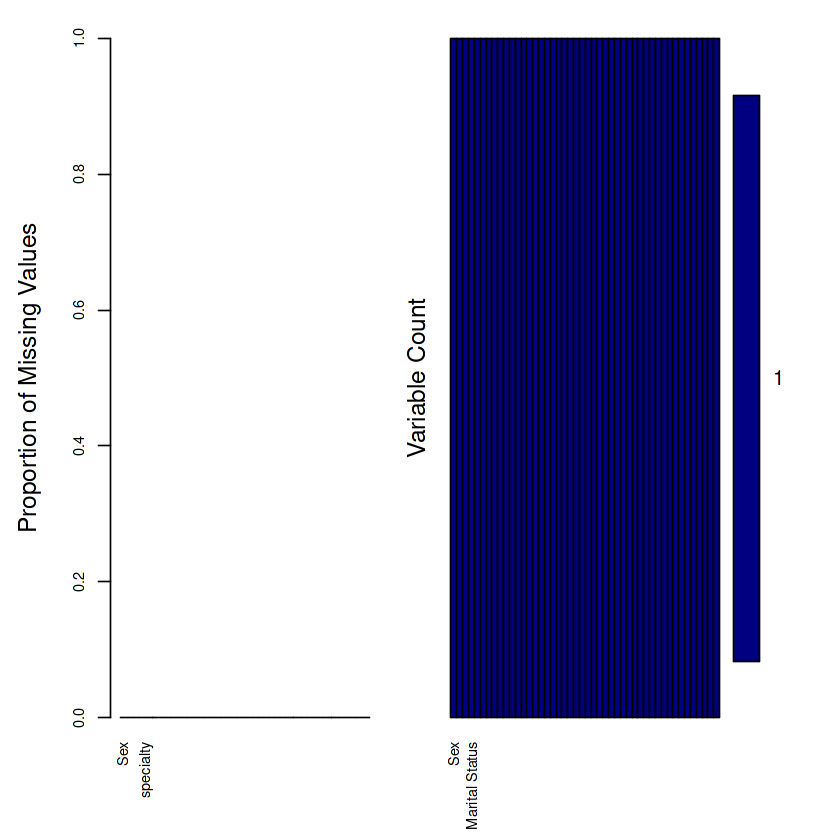

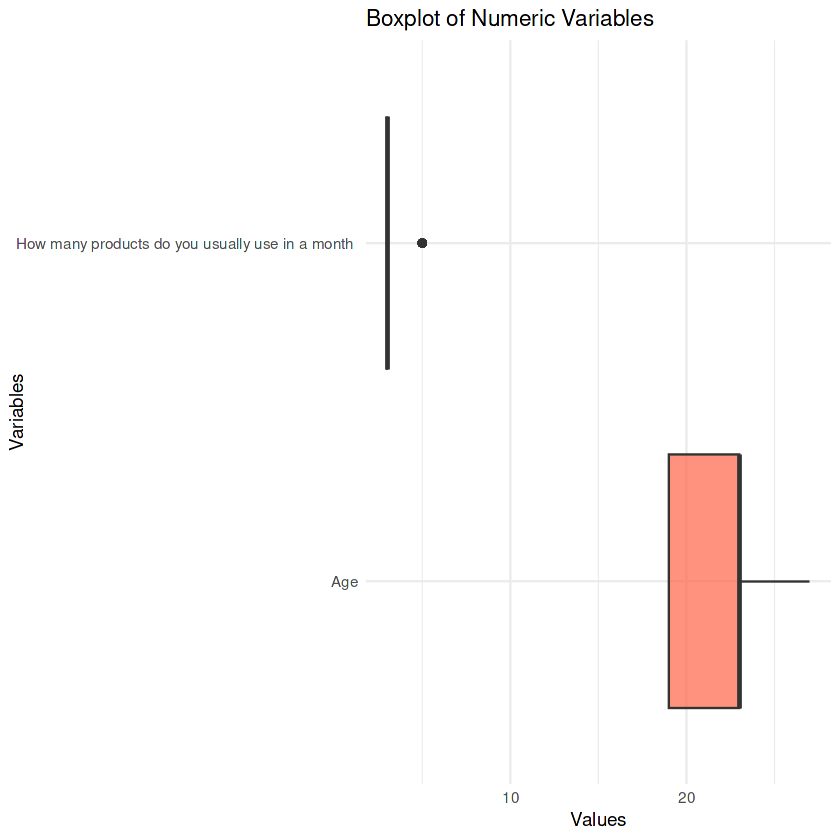

In [4]:
# Load necessary libraries
library(tidyverse)
library(readxl)
library(ggplot2)
library(dplyr)
library(psych)
library(VIM)

# Read the dataset
dataset <- read_excel("/kaggle/input/cosmetics-raw-data-cactus/INQ_QNGIY_34_01032025-1825_Cosmetics_Raw_Data.xlsx")

# Display first few rows
head(dataset)

# Check dataset structure
str(dataset)

# Convert age ranges to numeric (taking the midpoint)
dataset$Age <- as.numeric(str_extract(dataset$Age, "\\d+") %>% as.numeric() + 2)  # Example: "17-20" -> 18.5

# Convert categorical responses to factors
dataset <- dataset %>%
  mutate(across(where(is.character), as.factor))

# Convert possible numeric categorical variables (e.g., usage frequency)
dataset$`How many products do you usually use in a month؟` <- as.numeric(str_extract(dataset$`How many products do you usually use in a month؟`, "\\d+"))

# Check for missing values
missing_values <- colSums(is.na(dataset))
print(missing_values)

# Summary statistics
summary(dataset)

# Visualize missing data (Fixed `ylab` issue)
aggr(dataset, col=c("navyblue", "red"), numbers=TRUE, sortVars=TRUE, labels=names(dataset), 
     cex.axis=0.7, gap=3, ylab=c("Proportion of Missing Values", "Variable Count"))

# Identify truly numeric columns
num_cols <- dataset %>%
  select(where(is.numeric)) %>%
  colnames()

if (length(num_cols) > 0) {
  # Visualize numeric variable distributions (histograms)
  dataset %>%
    select(all_of(num_cols)) %>%
    pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
    ggplot(aes(value)) +
    geom_histogram(fill="steelblue", bins=30, alpha=0.7) +
    facet_wrap(~ variable, scales="free") +
    theme_minimal() +
    labs(title="Distribution of Numeric Variables", x="Value", y="Frequency")

  # Check for outliers using boxplots
  dataset %>%
    select(all_of(num_cols)) %>%
    pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
    ggplot(aes(x=variable, y=value)) +
    geom_boxplot(fill="tomato", alpha=0.7) +
    coord_flip() +
    theme_minimal() +
    labs(title="Boxplot of Numeric Variables", x="Variables", y="Values")
} else {
  print("No numeric columns found for visualization.")
}


1️⃣ Categorical Comparisons (Chi-Square Tests)

Does gender (Sex) influence cosmetic usage?
→ Chi-Square test: Sex vs. Do you use cosmetic products?
Does education level affect cosmetic usage?
→ Chi-Square test: Educational Level vs. Do you use cosmetic products?
Does nationality influence purchasing behavior?
→ Chi-Square test: Nationality vs. Where do you buy products?
Are product purchasing decisions influenced by recommendations?
→ Chi-Square test: Recommendation sources vs. Buying behavior

2️⃣ Mean Comparisons (t-Test / ANOVA)
Do different age groups use more or fewer products?
→ ANOVA: Age vs. Number of cosmetic products used
Does marital status affect cosmetic product usage?
→ ANOVA: Marital Status vs. Number of cosmetic products used

3️⃣ Correlation & Regression (Predicting Cosmetic Usage)
Can we predict the number of cosmetic products used per month?
→ Linear Regression: Predicting usage based on Age, Marital Status, Nationality, and Recommendations
Which factors most influence purchasing behavior?
→ Logistic Regression: Factors predicting whether someone buys expensive products

4️⃣ Visualizations
Bar Charts for categorical distributions
Boxplots for numeric comparisons
Regression Plots to visualize predictive modeling

In [13]:
colnames(dataset)


[1] "Nationality"                                                                                
 [2] "Age"                                                                                        
 [3] "Marital Status"                                                                             
 [4] "specialty"                                                                                  
 [5] "Educational Level"                                                                          
 [6] "Do you use cosmetic products?"                                                              
 [7] "How many products do you usually use in a month؟"                                           
 [8] "What is your average usage of cosmetic products"                                            
 [9] "What is the purpose of your use of cosmetic products"                                       
[10] "Does using cosmetics boost your self-confidence?"                                           
[11] "What products do you use most often?"                                                       
[12] "Have cosmetics ever caused you any harm due to their use?"                                  
[13] "How often have you experienced skin damage due to the use of cosmetics?"                    
[14] "I can recognize different cosmetic products and understand their uses."                     
[15] "I am aware that cosmetic products may contain chemicals that could cause harm when used."   
[16] "I know that cosmetics should not be used after their expiration date."                      
[17] "know the sources of colorants in cosmetic products."                                        
[18] "I know that there may be harms resulting from the use of cosmetics"                         
[19] "One of the causes of poor skin health is using expired cosmetic products"                   
[20] "Cosmetic products have a negative effect when left on the skin for a long time"             
[21] "premature wrinkles is one of the harmful effects of cosmetic products"                      
[22] "acne may be one of the harmful effects of cosmetic productsل"                               
[23] "I know some ingredients that cause allergies and itching for my skin"                       
[24] "I know that some cosmetic ingredients may cause cancer"                                     
[25] "I know that some products can cause dandruff and hair loss"                                 
[26] "What is the most trusted source for you when purchasing cosmetic products?"                 
[27] "I care about the active and inactive ingredients in cosmetic products"                      
[28] "I perform an allergy test before using certain cosmetic products"                           
[29] "I read the ingredient list of cosmetic products before using them"                          
[30] "I use cosmetic products after their expiration date"                                        
[31] "I dispose of cosmetic products immediately after their expiration date"                     
[32] "I notice undesirable changes in my skin due to the use of cosmetic products"                
[33] "I stop using any product that causes me allergies, itching, or skin irritation"             
[34] "I share my personal cosmetic products with others"                                          
[35] "I disinfect and clean the tools I use with cosmetic products (brushes and sponges)"         
[36] "I carefully remove cosmetics when I return home or before sleeping"                         
[37] "I buy cosmetic products based on recommendations from family and friends"                   
[38] "I buy cosmetic products based on recommendations from influencers and social media"         
[39] "I consult a pharmacist before purchasing cosmetic products for skin treatment"              
[40] "I follow the instructions on the product after reading them"                                
[41] "I have previously experienced skin 

In [14]:
# Clean column names to avoid errors with special characters
colnames(dataset) <- make.names(colnames(dataset), unique = TRUE)

# Print updated column names to verify
print(colnames(dataset))


 [1] "Nationality"                                                                                
 [2] "Age"                                                                                        
 [3] "Marital.Status"                                                                             
 [4] "specialty"                                                                                  
 [5] "Educational.Level"                                                                          
 [6] "Do.you.use.cosmetic.products."                                                              
 [7] "How.many.products.do.you.usually.use.in.a.month."                                           
 [8] "What.is.your.average.usage.of.cosmetic.products"                                            
 [9] "What.is.the.purpose.of.your.use.of.cosmetic.products"                                       
[10] "Does.using.cosmetics.boost.your.self.confidence."                                           
[11] "What

In [15]:
# Step 1: Ensure required columns exist in the dataset
required_columns <- c("Sex", 
                      "Educational.Level", 
                      "Nationality", 
                      "Do.you.use.cosmetic.products.", 
                      "I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends")

# Check if all required columns exist
if (all(required_columns %in% colnames(dataset))) {
  
  # 1️⃣ Chi-Square Test: Sex vs. Cosmetic Usage
  table_sex_cosmetics <- table(dataset$Sex, dataset$Do.you.use.cosmetic.products.)
  chi_sex_cosmetics <- chisq.test(table_sex_cosmetics)
  cat("\n1️⃣ Sex vs. Cosmetic Usage:\n")
  print(chi_sex_cosmetics)

  # 2️⃣ Chi-Square Test: Education Level vs. Cosmetic Usage
  table_edu_cosmetics <- table(dataset$Educational.Level, dataset$Do.you.use.cosmetic.products.)
  chi_edu_cosmetics <- chisq.test(table_edu_cosmetics)
  cat("\n2️⃣ Education Level vs. Cosmetic Usage:\n")
  print(chi_edu_cosmetics)

  # 3️⃣ Chi-Square Test: Nationality vs. Buying Behavior
  table_nationality_buying <- table(dataset$Nationality, dataset$Do.you.use.cosmetic.products.)
  chi_nationality_buying <- chisq.test(table_nationality_buying)
  cat("\n3️⃣ Nationality vs. Buying Behavior:\n")
  print(chi_nationality_buying)

  # 4️⃣ Chi-Square Test: Recommendation Sources vs. Buying Behavior
  table_recommendations <- table(dataset$I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends, dataset$Do.you.use.cosmetic.products.)
  chi_recommendations <- chisq.test(table_recommendations)
  cat("\n4️⃣ Recommendations vs. Buying Behavior:\n")
  print(chi_recommendations)

} else {
  cat("Error: One or more required columns are missing. Please check dataset column names.\n")
}


Error: One or more required columns are missing. Please check dataset column names.


In [16]:
print(colnames(dataset))


 [1] "Nationality"                                                                                
 [2] "Age"                                                                                        
 [3] "Marital.Status"                                                                             
 [4] "specialty"                                                                                  
 [5] "Educational.Level"                                                                          
 [6] "Do.you.use.cosmetic.products."                                                              
 [7] "How.many.products.do.you.usually.use.in.a.month."                                           
 [8] "What.is.your.average.usage.of.cosmetic.products"                                            
 [9] "What.is.the.purpose.of.your.use.of.cosmetic.products"                                       
[10] "Does.using.cosmetics.boost.your.self.confidence."                                           
[11] "What

In [17]:
# Step 1: Clean Column Names (if not done already)
colnames(dataset) <- make.names(colnames(dataset), unique = TRUE)

# Print column names to verify
print(colnames(dataset))

# Step 2: Run Chi-Square Tests with Correct Column Names
required_columns <- c("Sex", 
                      "Educational.Level", 
                      "Nationality", 
                      "Do.you.use.cosmetic.products.", 
                      "I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends")

# Check if all required columns exist
if (all(required_columns %in% colnames(dataset))) {
  
  # 1️⃣ Chi-Square Test: Sex vs. Cosmetic Usage
  table_sex_cosmetics <- table(dataset$Sex, dataset$Do.you.use.cosmetic.products.)
  chi_sex_cosmetics <- chisq.test(table_sex_cosmetics)
  cat("\n1️⃣ Sex vs. Cosmetic Usage:\n")
  print(chi_sex_cosmetics)

  # 2️⃣ Chi-Square Test: Education Level vs. Cosmetic Usage
  table_edu_cosmetics <- table(dataset$Educational.Level, dataset$Do.you.use.cosmetic.products.)
  chi_edu_cosmetics <- chisq.test(table_edu_cosmetics)
  cat("\n2️⃣ Education Level vs. Cosmetic Usage:\n")
  print(chi_edu_cosmetics)

  # 3️⃣ Chi-Square Test: Nationality vs. Buying Behavior
  table_nationality_buying <- table(dataset$Nationality, dataset$Do.you.use.cosmetic.products.)
  chi_nationality_buying <- chisq.test(table_nationality_buying)
  cat("\n3️⃣ Nationality vs. Buying Behavior:\n")
  print(chi_nationality_buying)

  # 4️⃣ Chi-Square Test: Recommendation Sources vs. Buying Behavior
  table_recommendations <- table(dataset$I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends, dataset$Do.you.use.cosmetic.products.)
  chi_recommendations <- chisq.test(table_recommendations)
  cat("\n4️⃣ Recommendations vs. Buying Behavior:\n")
  print(chi_recommendations)

} else {
  cat("Error: One or more required columns are missing. Please check dataset column names.\n")
}


 [1] "Nationality"                                                                                
 [2] "Age"                                                                                        
 [3] "Marital.Status"                                                                             
 [4] "specialty"                                                                                  
 [5] "Educational.Level"                                                                          
 [6] "Do.you.use.cosmetic.products."                                                              
 [7] "How.many.products.do.you.usually.use.in.a.month."                                           
 [8] "What.is.your.average.usage.of.cosmetic.products"                                            
 [9] "What.is.the.purpose.of.your.use.of.cosmetic.products"                                       
[10] "Does.using.cosmetics.boost.your.self.confidence."                                           
[11] "What

In [18]:
summary(dataset)


    Nationality       Age        Marital.Status        specialty  
 Non-Saudi:  1   Min.   :19.00   Married: 43    Literary/Art:116  
 Saudi    :548   1st Qu.:19.00   Single :506    Medical     :296  
                 Median :23.00                  Scientific  :137  
                 Mean   :21.45                                    
                 3rd Qu.:23.00                                    
                 Max.   :27.00                                    
                                                                  
       Educational.Level Do.you.use.cosmetic.products.
 Bachelor Degree:538     No : 42                      
 Diploma        : 11     yes:507                      
                                                      
                                                      
                                                      
                                                      
                                                      
 How.many.products.do.yo

In [19]:
any(is.na(dataset))


[1] FALSE

In [21]:
# Ensure column names are valid
colnames(dataset) <- make.names(colnames(dataset), unique = TRUE)

# Define required columns
required_columns <- c("Do.you.use.cosmetic.products.",
                      "Educational.Level",
                      "Nationality",
                      "Marital.Status",
                      "I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends")

# Check if columns exist
if (all(required_columns %in% colnames(dataset))) {
  
  ### 1️⃣ Marital Status vs. Cosmetic Usage ###
  table_marital_cosmetics <- table(dataset$Marital.Status, dataset$Do.you.use.cosmetic.products.)
  if (any(chisq.test(table_marital_cosmetics)$expected < 5)) {
    cat("\n1️⃣ Marital Status vs. Cosmetic Usage (Fisher's Exact Test Used):\n")
    print(fisher.test(table_marital_cosmetics))
  } else {
    cat("\n1️⃣ Marital Status vs. Cosmetic Usage (Chi-Square Test):\n")
    print(chisq.test(table_marital_cosmetics))
  }
  
  ### 2️⃣ Education Level vs. Cosmetic Usage ###
  table_edu_cosmetics <- table(dataset$Educational.Level, dataset$Do.you.use.cosmetic.products.)
  if (any(chisq.test(table_edu_cosmetics)$expected < 5)) {
    cat("\n2️⃣ Education Level vs. Cosmetic Usage (Fisher's Exact Test Used):\n")
    print(fisher.test(table_edu_cosmetics))
  } else {
    cat("\n2️⃣ Education Level vs. Cosmetic Usage (Chi-Square Test):\n")
    print(chisq.test(table_edu_cosmetics))
  }
  
  ### 3️⃣ Nationality vs. Buying Behavior ###
  table_nationality_buying <- table(dataset$Nationality, dataset$Do.you.use.cosmetic.products.)
  if (any(chisq.test(table_nationality_buying)$expected < 5)) {
    cat("\n3️⃣ Nationality vs. Buying Behavior (Fisher's Exact Test Used):\n")
    print(fisher.test(table_nationality_buying))
  } else {
    cat("\n3️⃣ Nationality vs. Buying Behavior (Chi-Square Test):\n")
    print(chisq.test(table_nationality_buying))
  }
  
  ### 4️⃣ Recommendations vs. Buying Behavior ###
  table_recommendations <- table(dataset$I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends, dataset$Do.you.use.cosmetic.products.)
  if (any(chisq.test(table_recommendations)$expected < 5)) {
    cat("\n4️⃣ Recommendations vs. Buying Behavior (Fisher's Exact Test Used):\n")
    print(fisher.test(table_recommendations))
  } else {
    cat("\n4️⃣ Recommendations vs. Buying Behavior (Chi-Square Test):\n")
    print(chisq.test(table_recommendations))
  }

} else {
  missing_cols <- setdiff(required_columns, colnames(dataset))
  cat("Error: The following columns are missing in the dataset:\n", missing_cols, "\n")
}


Warning message in chisq.test(table_marital_cosmetics):
“Chi-squared approximation may be incorrect”



1️⃣ Marital Status vs. Cosmetic Usage (Fisher's Exact Test Used):

	Fisher's Exact Test for Count Data

data:  table_marital_cosmetics
p-value = 0.5598
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3113351 3.7825397
sample estimates:
odds ratio 
  1.262573 



Warning message in chisq.test(table_edu_cosmetics):
“Chi-squared approximation may be incorrect”



2️⃣ Education Level vs. Cosmetic Usage (Fisher's Exact Test Used):

	Fisher's Exact Test for Count Data

data:  table_edu_cosmetics
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2043615       Inf
sample estimates:
odds ratio 
       Inf 



Warning message in chisq.test(table_nationality_buying):
“Chi-squared approximation may be incorrect”



3️⃣ Nationality vs. Buying Behavior (Fisher's Exact Test Used):

	Fisher's Exact Test for Count Data

data:  table_nationality_buying
p-value = 0.0765
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3095238       Inf
sample estimates:
odds ratio 
       Inf 



Warning message in chisq.test(table_recommendations):
“Chi-squared approximation may be incorrect”



4️⃣ Recommendations vs. Buying Behavior (Fisher's Exact Test Used):

	Fisher's Exact Test for Count Data

data:  table_recommendations
p-value = 8.167e-06
alternative hypothesis: two.sided



             Df Sum Sq Mean Sq F value  Pr(>F)    
Age           2   15.8   7.906   11.66 1.1e-05 ***
Residuals   546  370.3   0.678                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                Df Sum Sq Mean Sq F value   Pr(>F)    
Marital.Status   1   10.5  10.520   15.32 0.000102 ***
Residuals      547  375.6   0.687                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

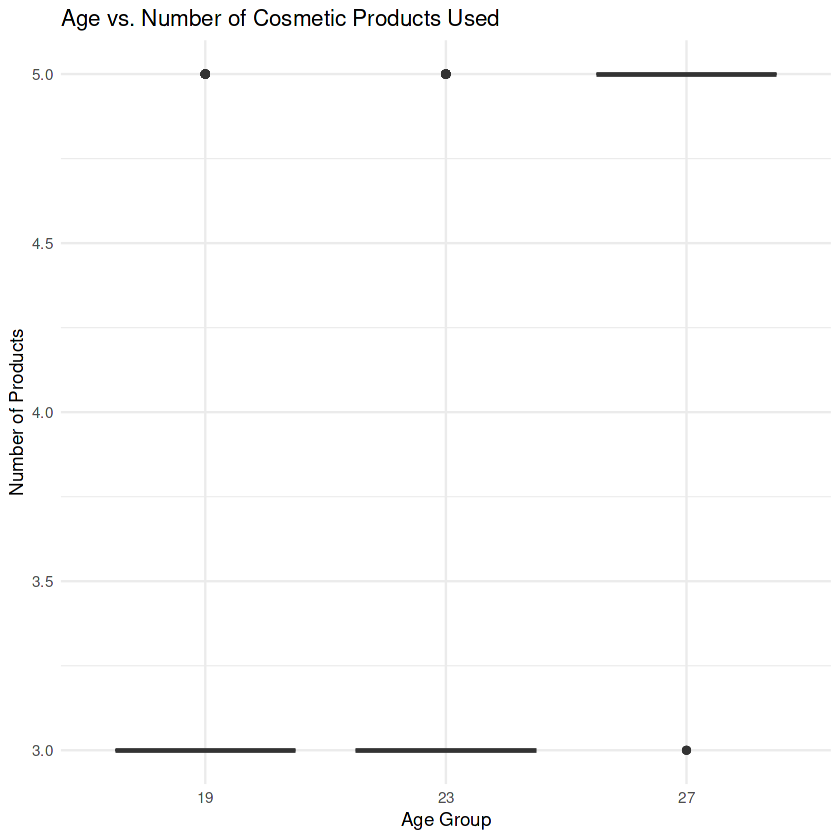

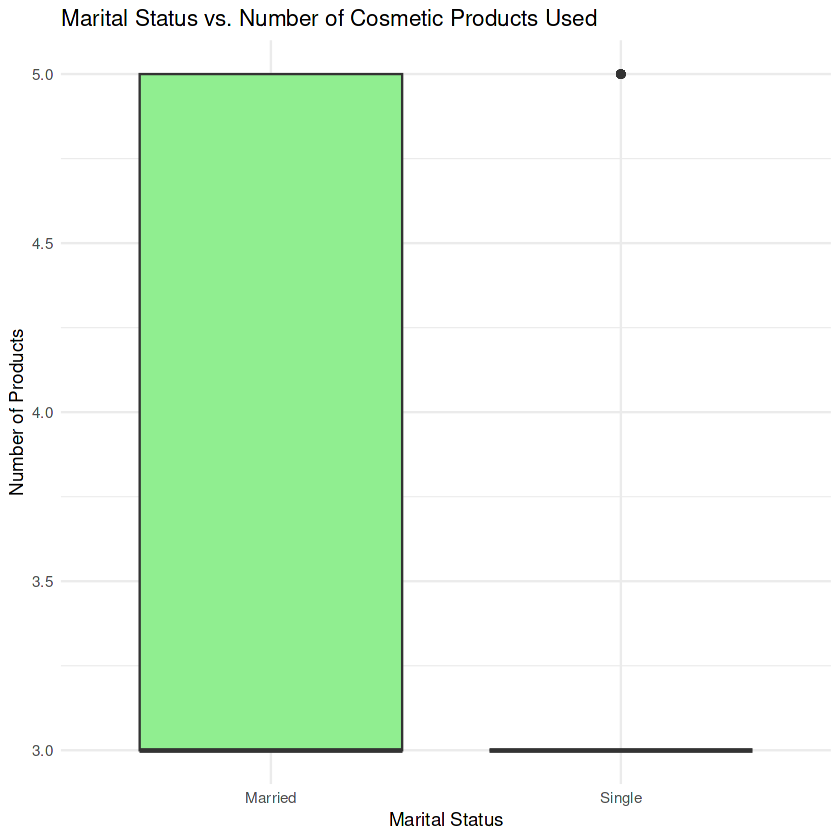

In [22]:
# Load necessary libraries
library(ggplot2)

# Convert categorical variables to factors
dataset$Age <- as.factor(dataset$Age)
dataset$Marital.Status <- as.factor(dataset$Marital.Status)

# Convert "How many products do you usually use in a month?" to numeric
dataset$How.many.products.do.you.usually.use.in.a.month. <- as.numeric(dataset$How.many.products.do.you.usually.use.in.a.month.)

# ANOVA: Age vs. Number of cosmetic products used
anova_age <- aov(How.many.products.do.you.usually.use.in.a.month. ~ Age, data = dataset)
summary(anova_age)

# ANOVA: Marital Status vs. Number of cosmetic products used
anova_marital <- aov(How.many.products.do.you.usually.use.in.a.month. ~ Marital.Status, data = dataset)
summary(anova_marital)

# Boxplot: Visualizing Age vs. Product Usage
ggplot(dataset, aes(x = Age, y = How.many.products.do.you.usually.use.in.a.month.)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Age vs. Number of Cosmetic Products Used", x = "Age Group", y = "Number of Products") +
  theme_minimal()

# Boxplot: Visualizing Marital Status vs. Product Usage
ggplot(dataset, aes(x = Marital.Status, y = How.many.products.do.you.usually.use.in.a.month.)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Marital Status vs. Number of Cosmetic Products Used", x = "Marital Status", y = "Number of Products") +
  theme_minimal()


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = How.many.products.do.you.usually.use.in.a.month. ~ Age, data = dataset)

$Age
             diff        lwr       upr     p adj
23-19 -0.03842421 -0.2077190 0.1308706 0.8549424
27-19  1.08713410  0.5350957 1.6391725 0.0000138
27-23  1.12555831  0.5776032 1.6735134 0.0000054

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = How.many.products.do.you.usually.use.in.a.month. ~ Marital.Status, data = dataset)

$Marital.Status
                     diff        lwr        upr     p adj
Single-Married -0.5152128 -0.7737821 -0.2566434 0.0001022



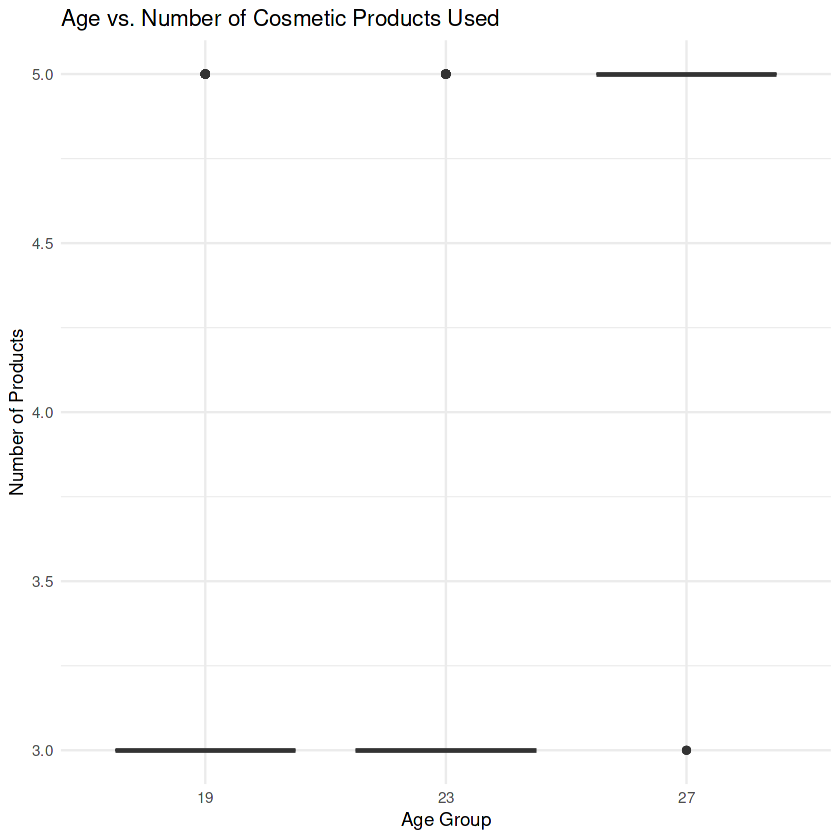

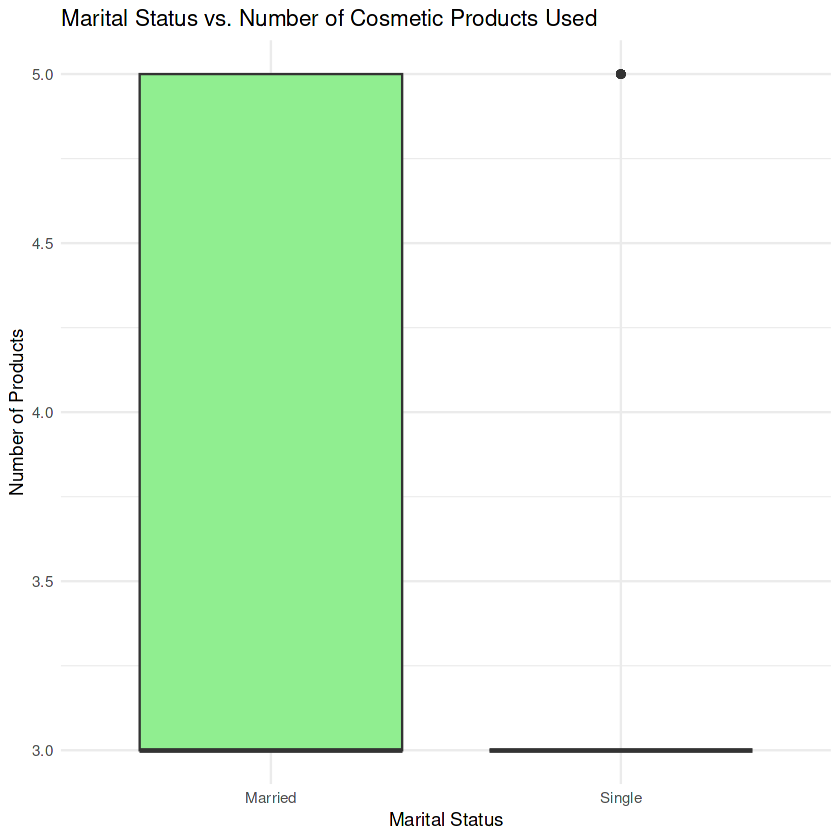

In [23]:
# Tukey HSD test for Age
tukey_age <- TukeyHSD(anova_age)
print(tukey_age)

# Tukey HSD test for Marital Status
tukey_marital <- TukeyHSD(anova_marital)
print(tukey_marital)

# Boxplot with statistical significance annotations for Age
ggplot(dataset, aes(x = Age, y = How.many.products.do.you.usually.use.in.a.month.)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Age vs. Number of Cosmetic Products Used", x = "Age Group", y = "Number of Products") +
  theme_minimal()

# Boxplot with statistical significance annotations for Marital Status
ggplot(dataset, aes(x = Marital.Status, y = How.many.products.do.you.usually.use.in.a.month.)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Marital Status vs. Number of Cosmetic Products Used", x = "Marital Status", y = "Number of Products") +
  theme_minimal()



Call:
lm(formula = How.many.products.do.you.usually.use.in.a.month. ~ 
    Age + Marital.Status + Nationality + I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends + 
        I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.media, 
    data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68509 -0.47090 -0.38756 -0.08077  1.94274 

Coefficients:
                                                                                                    Estimate
(Intercept)                                                                                          3.32766
Age23                                                                                               -0.07826
Age27                                                                                                0.78361
Marital.StatusSingle                                                                                -0.33824
NationalitySaudi                  

`geom_smooth()` using formula = 'y ~ x'


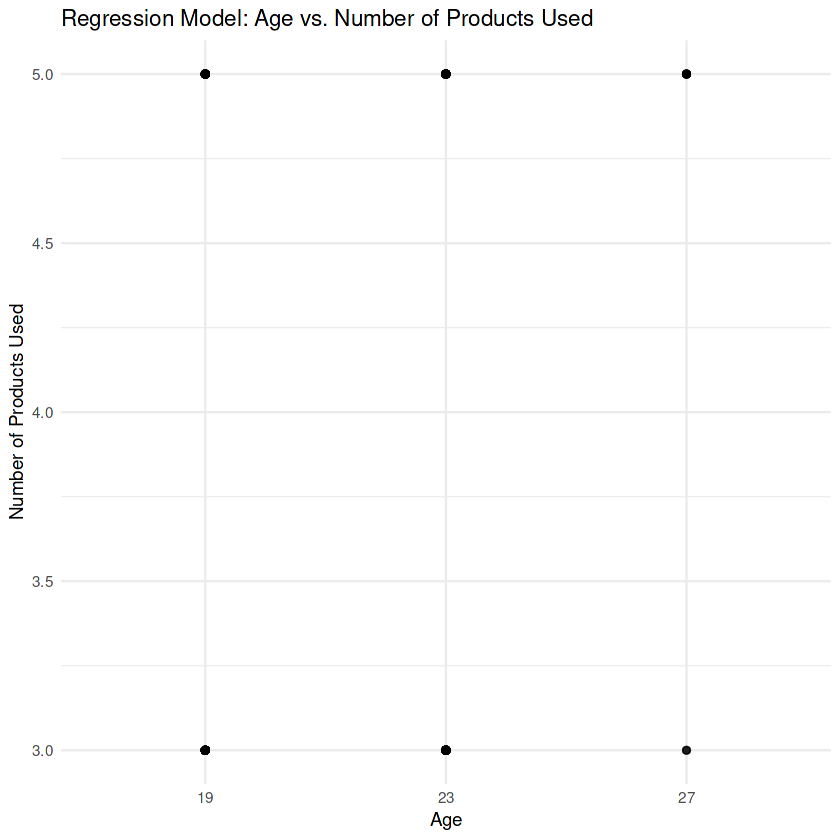

In [24]:
# Linear Regression Model: Predicting Cosmetic Product Usage
model_usage <- lm(How.many.products.do.you.usually.use.in.a.month. ~ Age + Marital.Status + Nationality + I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends + I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.media, data = dataset)

# Summary of Regression Model
summary(model_usage)

# Visualizing Regression Predictions
ggplot(dataset, aes(x = Age, y = How.many.products.do.you.usually.use.in.a.month.)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "blue", fill = "lightblue") +
  labs(title = "Regression Model: Age vs. Number of Products Used", x = "Age", y = "Number of Products Used") +
  theme_minimal()



Call:
glm(formula = expensive_binary ~ Age + Marital.Status + Nationality + 
    How.many.products.do.you.usually.use.in.a.month. + I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends + 
    I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.media, 
    family = binomial, data = dataset)

Coefficients:
                                                                                                     Estimate
(Intercept)                                                                                         -12.73127
Age23                                                                                                -0.12020
Age27                                                                                                -0.17343
Marital.StatusSingle                                                                                 -0.87514
NationalitySaudi                                                                                  

(Intercept) 
                                                                                       2.957179e-06 
                                                                                              Age23 
                                                                                       8.867430e-01 
                                                                                              Age27 
                                                                                       8.407732e-01 
                                                                               Marital.StatusSingle 
                                                                                       4.168034e-01 
                                                                                   NationalitySaudi 
                                                                                       5.058128e+05 
                                                   How.many.products.do.you.usually.use.in.a.month. 
                                                                                       1.027892e+00 
                   I.buy.cosmetic.products.based.on.recommendations.from.family.and.friendsNo agree 
                                                                                       9.586958e-01 
          I.buy.cosmetic.products.based.on.recommendations.from.family.and.friendsNo strongly agree 
                                                                                       7.116535e-01 
             I.buy.cosmetic.products.based.on.recommendations.from.family.and.friendsstrongly agree 
                                                                                       1.266196e+00 
                     I.buy.cosmetic.products.based.on.recommendations.from.family.and.friendsunsure 
                                                                                       2.204014e+00 
         I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.mediaNo agree 
                                                                                       7.004584e-01 
I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.mediaNo strongly agree 
                                                                                       5.109884e-01 
   I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.mediastrongly agree 
                                                                                       1.202008e+00 
           I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.mediaunsure 
                                                                                       1.072562e+00

`geom_smooth()` using formula = 'y ~ x'


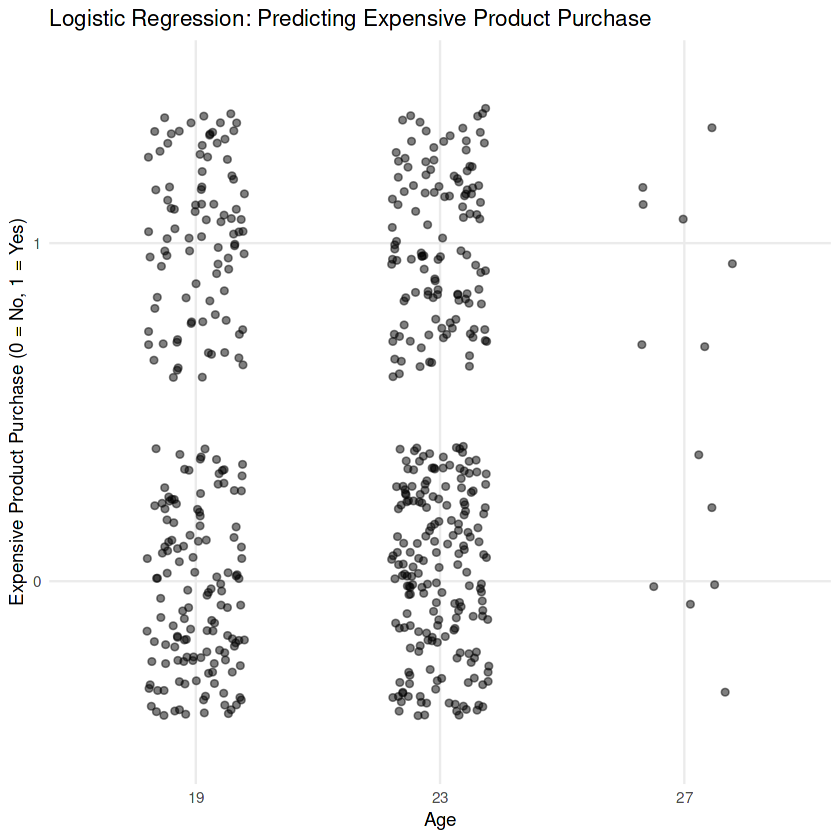

In [25]:
# Logistic Regression Model: Predicting Expensive Product Purchase
model_expensive <- glm(expensive_binary ~ Age + Marital.Status + Nationality + 
                       How.many.products.do.you.usually.use.in.a.month. + 
                       I.buy.cosmetic.products.based.on.recommendations.from.family.and.friends + 
                       I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.media, 
                       data = dataset, family = binomial)

# Summary of Logistic Regression Model
summary(model_expensive)

# Odds Ratios for better interpretation
exp(coef(model_expensive))

# Visualizing predictions
ggplot(dataset, aes(x = Age, y = expensive_binary)) +
  geom_jitter(alpha = 0.5, width = 0.2) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "blue") +
  labs(title = "Logistic Regression: Predicting Expensive Product Purchase", x = "Age", y = "Expensive Product Purchase (0 = No, 1 = Yes)") +
  theme_minimal()


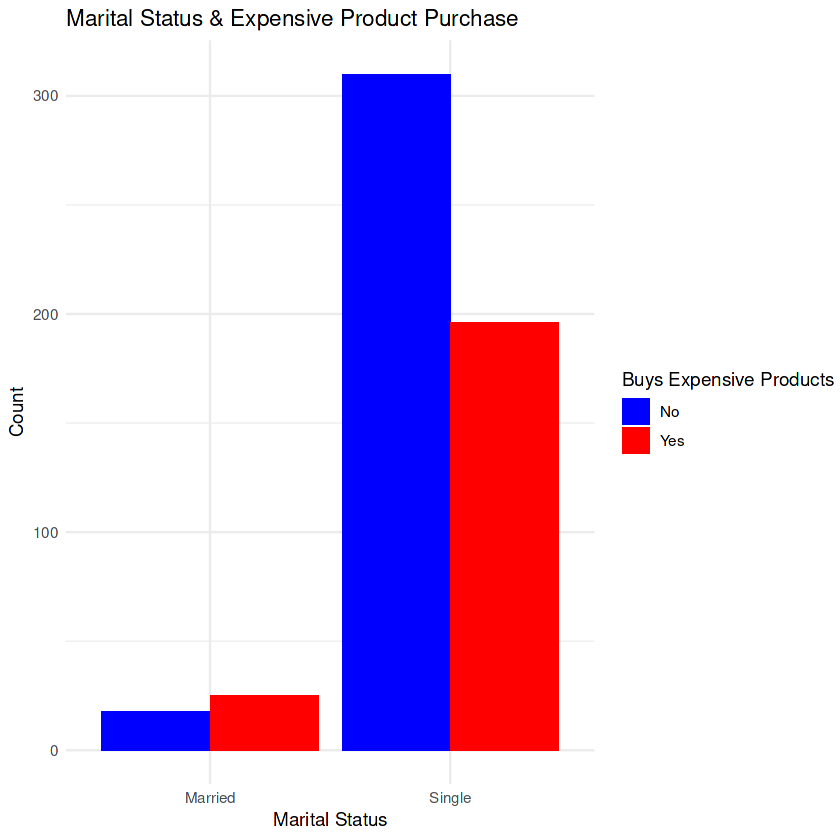

`geom_smooth()` using formula = 'y ~ x'


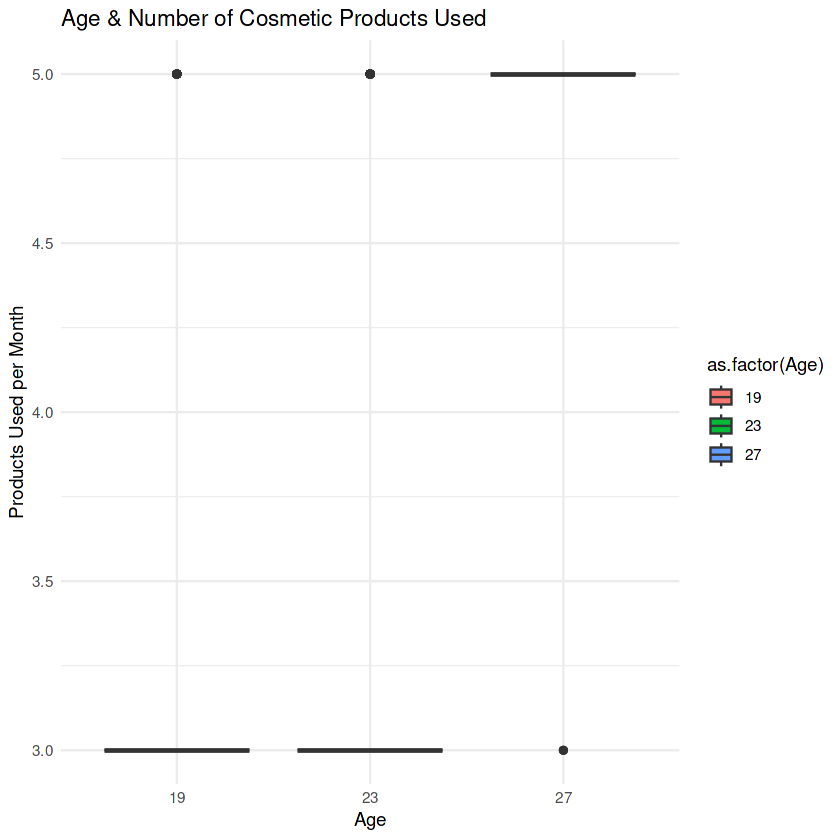

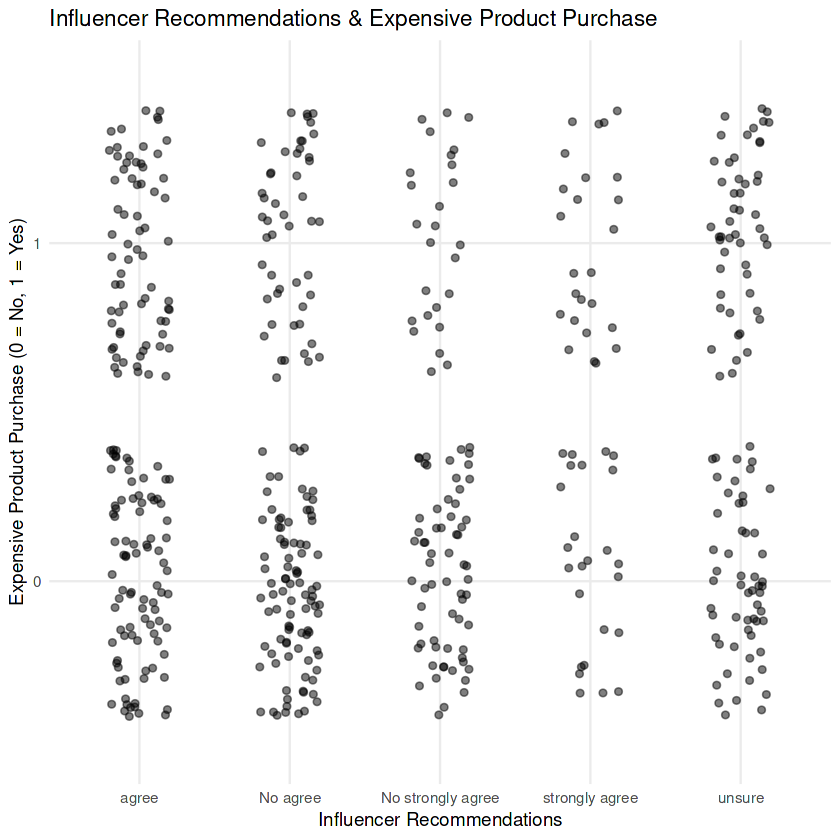

In [26]:
# 1️⃣ Bar Plot: Marital Status vs. Buying Expensive Products
ggplot(dataset, aes(x = Marital.Status, fill = as.factor(expensive_binary))) +
  geom_bar(position = "dodge") +
  labs(title = "Marital Status & Expensive Product Purchase", x = "Marital Status", y = "Count") +
  scale_fill_manual(values = c("blue", "red"), name = "Buys Expensive Products", labels = c("No", "Yes")) +
  theme_minimal()

# 2️⃣ Boxplot: Age vs. Cosmetic Product Usage
ggplot(dataset, aes(x = as.factor(Age), y = How.many.products.do.you.usually.use.in.a.month., fill = as.factor(Age))) +
  geom_boxplot() +
  labs(title = "Age & Number of Cosmetic Products Used", x = "Age", y = "Products Used per Month") +
  theme_minimal()

# 3️⃣ Regression Plot: Influence of Recommendations on Buying Expensive Products
ggplot(dataset, aes(x = I.buy.cosmetic.products.based.on.recommendations.from.influencers.and.social.media, y = expensive_binary)) +
  geom_jitter(alpha = 0.5, width = 0.2) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "blue") +
  labs(title = "Influencer Recommendations & Expensive Product Purchase", x = "Influencer Recommendations", y = "Expensive Product Purchase (0 = No, 1 = Yes)") +
  theme_minimal()
